In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

In [2]:
tn_data = pd.read_csv('\\Users\\Gowrishankar\\Desktop\\assgnment job\\Logistic_Dataset\\train.csv')
tn_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [3]:
print('The shape is: %s passengers and %s features'%(tn_data.shape[0],tn_data.shape[1]))

The shape is: 891 passengers and 12 features


In [4]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

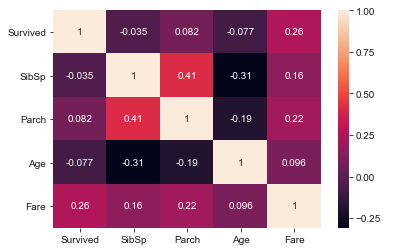

In [6]:
heatmap = sns.heatmap(tn_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

In [7]:
tn_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


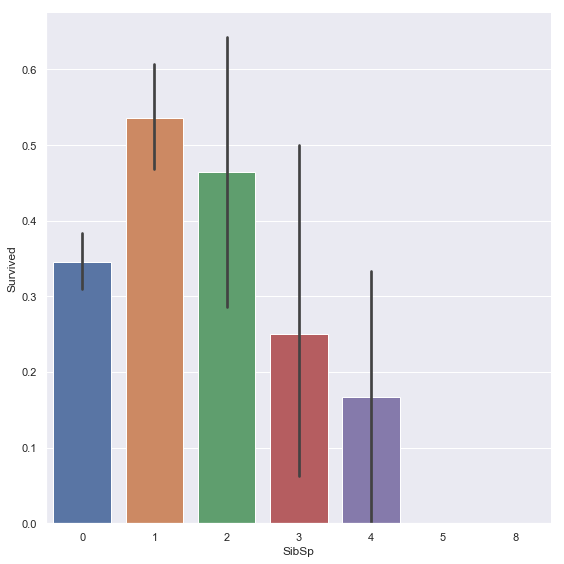

In [8]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = tn_data, kind="bar", height = 8)

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


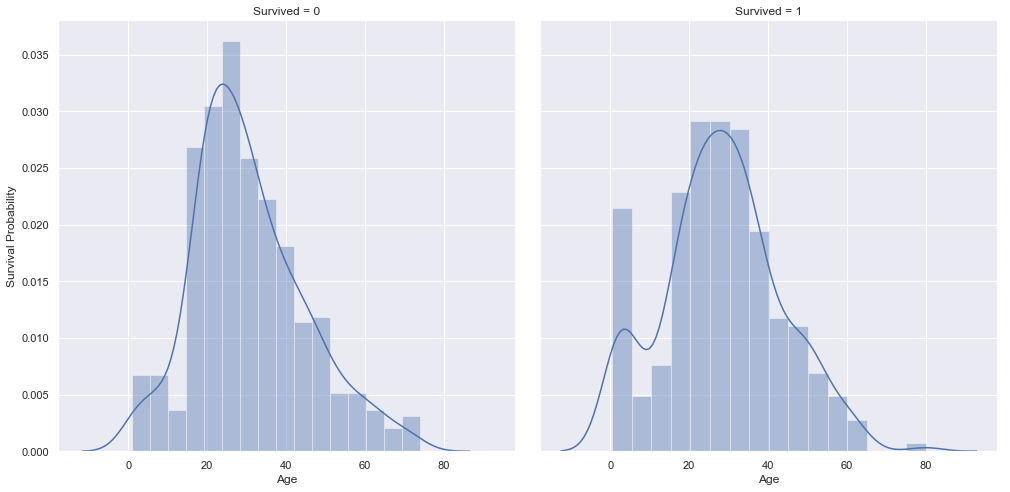

In [9]:
ageplot = sns.FacetGrid(tn_data, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


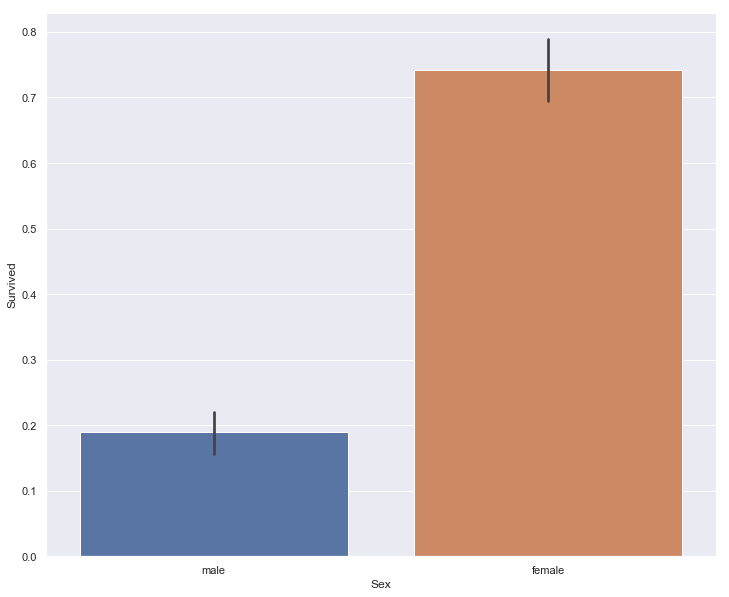

In [10]:
sexplot = sns.barplot(x="Sex", y="Survived", data=tn_data)

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


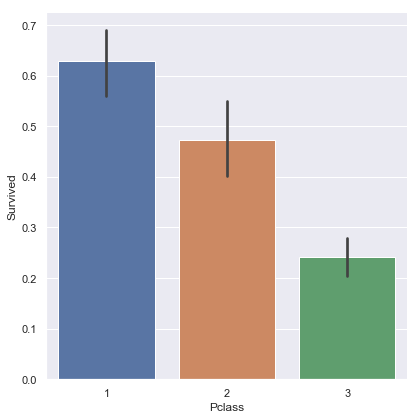

In [11]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = tn_data, kind="bar", height = 6)

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


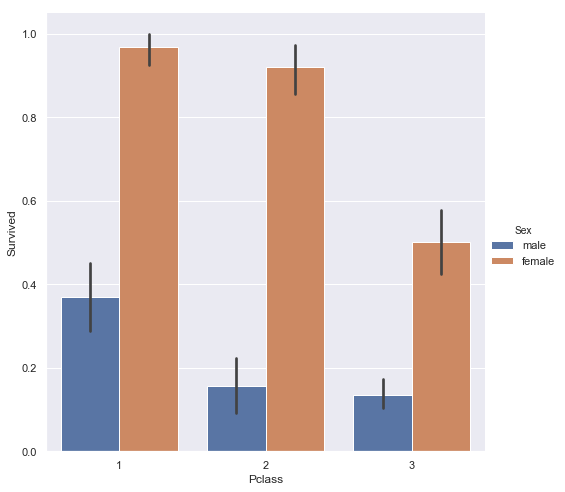

In [12]:
a = sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=tn_data, height = 7, kind="bar")

In [13]:
tn_data["Embarked"].isnull().sum()

2

In [14]:
tn_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
tn_data["Embarked"] = tn_data["Embarked"].fillna('S')

C:\Users\Gowrishankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


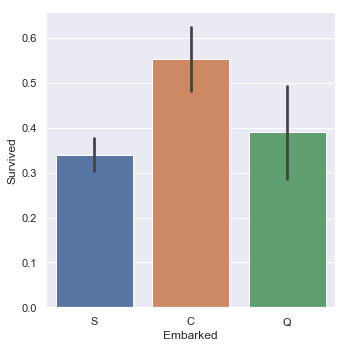

In [16]:
sns.catplot(x="Embarked", y="Survived", data=tn_data, height = 5, kind="bar")

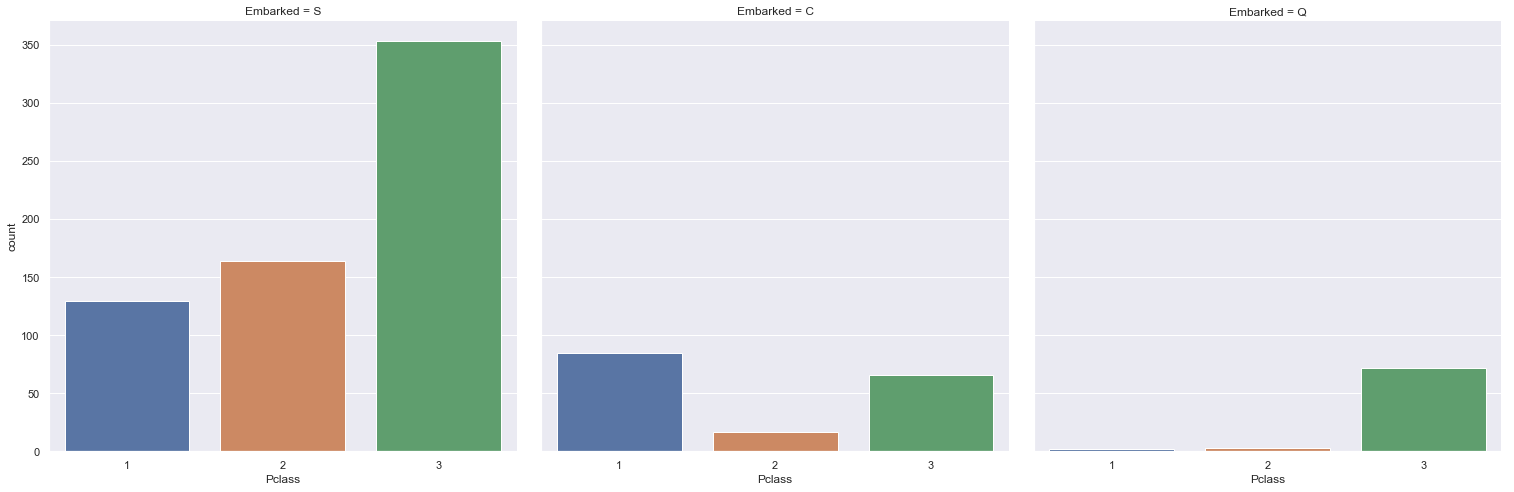

In [17]:
sns.catplot(x="Pclass", col="Embarked", data = tn_data, kind="count", height=7)

In [18]:
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
mean = tn_data["Age"].mean()
std = tn_data["Age"].std()
print(mean)
print(std)

29.69911764705882
14.526497332334044


In [20]:
rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = tn_data["Age"].copy()

age_slice[np.isnan(age_slice)] = rand_age
tn_data["Age"] = age_slice
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
tn_data.drop(col_to_drop, axis=1, inplace=True)
tn_data.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male  42.0      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C

In [23]:
genders = {"male":0, "female":1}
tn_data["Sex"] = tn_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
tn_data["Embarked"] = tn_data["Embarked"].map(ports)

tn_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0

In [33]:
df_tn_x = tn_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_tn_y = tn_data[['Survived']]

#x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [26]:
# Shuffle your dataset 
shuffle_df_x = df_tn_x.sample(frac=1)

# Define a size for your train set 
train_size_x = int(0.7 * len(df_tn_x))

# Split your dataset 
train_set_x = shuffle_df_x[:train_size_x]
test_set_x = shuffle_df_[train_size_x:]

In [27]:
# Shuffle your dataset 
shuffle_df_y = df_tn_y.sample(frac=1)

# Define a size for your train set 
train_size_y = int(0.7 * len(df_tn_y))

# Split your dataset 
train_set_y = shuffle_df_y[:train_size_y]
test_set_y = shuffle_df_y[train_size_y:]

In [30]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + (-1*b1*x))) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [31]:
# Training the model
b0, b1 = logistic_regression(train_set_x, train_set_y)

# Making predictions
X_test_norm = normalize(test_set_x)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(test_set_x, test_set_y)
plt.scatter(test_set_x, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

TypeError: unsupported operand type(s) for +: 'int' and 'str'